In [14]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots

#pd.options.mode.chained_assignment = None



# Now we need to read in the data
#df = pd.read_csv(r'D:\Coursera\Protfolio prep\movies.csv')
df = pd.read_csv('movies1.csv')

In [20]:
# Now let's take a look at the data
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000.0,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772.0,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000.0,Stephen King,1980
1,4500000.0,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106.0,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000.0,Henry De Vere Stacpoole,1980
2,18000000.0,Lucasfilm,United States,Irvin Kershner,Action,538375067.0,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000.0,Leigh Brackett,1980
3,3500000.0,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539.0,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000.0,Jim Abrahams,1980
4,6000000.0,Orion Pictures,United States,Harold Ramis,Comedy,39846344.0,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000.0,Brian Doyle-Murray,1980


In [19]:
#delete missing data
df = df.dropna()

#missing data check
for col in df.columns:
   pct_missing = np.mean(df[col].isnull())
   print('{} - {}%'.format(col, (pct_missing*100)))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [21]:
#Data types for our columns 

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object

In [24]:
#change data type 

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [104]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,released_date
5445,237000000,1382,47,785,0,2847246203,386,5,496,162.0,7.8,1534,1100000.0,1263,2009,496
7445,356000000,983,47,105,0,2797501328,388,5,124,181.0,8.4,1470,903000.0,513,2019,124
3045,200000000,1382,47,785,6,2201647264,4909,5,502,194.0,7.8,1073,1100000.0,1263,1997,502
6663,245000000,945,47,768,0,2069521700,3643,5,498,138.0,7.8,356,876000.0,1806,2015,498
7244,321000000,983,47,105,0,2048359754,389,5,132,149.0,8.4,1470,897000.0,513,2018,132


In [55]:
#create correct year column

df['released'] = df['released'].str.split('(').str[0].str.strip()


#df['yearcorrect'] = df['released'].astype(str).str[:4]

df['yearcorrect'] = pd.to_datetime(
    df['released'].str.split('(').str[0].str.strip(),
    errors='coerce'
).dt.year

In [105]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,released_date
5445,237000000,1382,47,785,0,2847246203,386,5,496,162.0,7.8,1534,1100000.0,1263,2009,496
7445,356000000,983,47,105,0,2797501328,388,5,124,181.0,8.4,1470,903000.0,513,2019,124
3045,200000000,1382,47,785,6,2201647264,4909,5,502,194.0,7.8,1073,1100000.0,1263,1997,502
6663,245000000,945,47,768,0,2069521700,3643,5,498,138.0,7.8,356,876000.0,1806,2015,498
7244,321000000,983,47,105,0,2048359754,389,5,132,149.0,8.4,1470,897000.0,513,2018,132


In [64]:
df[['released', 'yearcorrect']].head(10)

df['yearcorrect'] = df['yearcorrect'].astype('Int64')


In [106]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,released_date
5445,237000000,1382,47,785,0,2847246203,386,5,496,162.0,7.8,1534,1100000.0,1263,2009,496
7445,356000000,983,47,105,0,2797501328,388,5,124,181.0,8.4,1470,903000.0,513,2019,124
3045,200000000,1382,47,785,6,2201647264,4909,5,502,194.0,7.8,1073,1100000.0,1263,1997,502
6663,245000000,945,47,768,0,2069521700,3643,5,498,138.0,7.8,356,876000.0,1806,2015,498
7244,321000000,983,47,105,0,2048359754,389,5,132,149.0,8.4,1470,897000.0,513,2018,132


In [79]:
df= df.sort_values(by=['gross'], inplace=False, ascending=False)


In [68]:
pd.set_option('display.max_rows', None)
#drop any duplicates
#df['company'].drop_duplicates().sort_values(ascending=False)
#df['company'].sort_values(ascending=False)

#df.drop_duplicates()

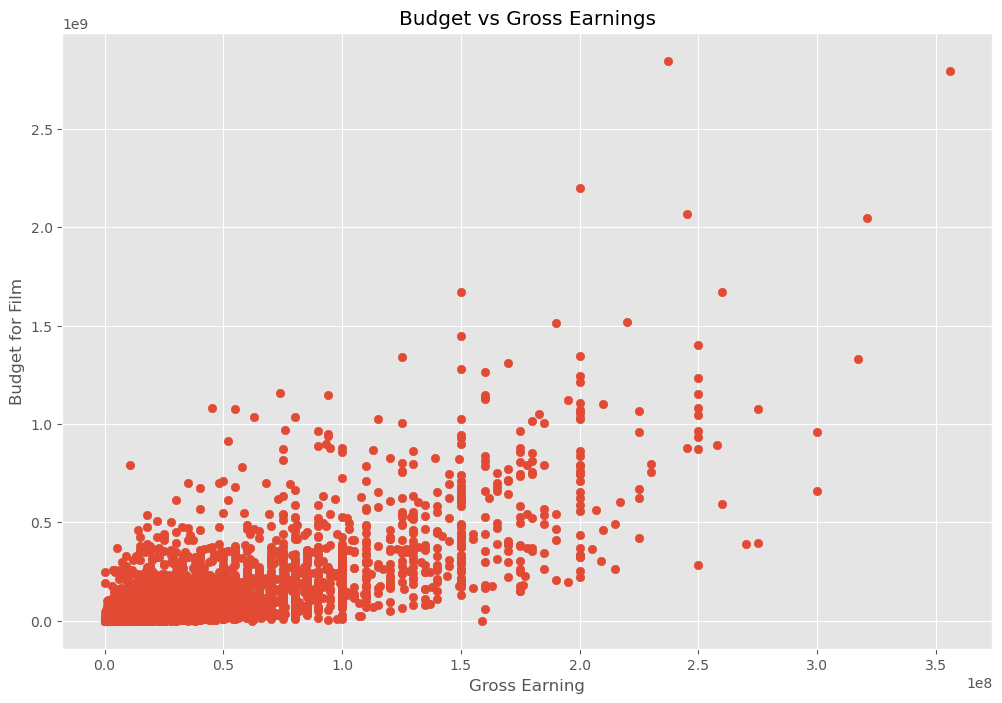

In [81]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for Film')

plt.show()

In [80]:
df.head()



,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,released_date
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,2009,"December 18, 2009"
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,2019,"April 26, 2019"
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,1997,"December 19, 1997"
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,2015,"December 18, 2015"
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,2018,"April 27, 2018"


<Axes: xlabel='budget', ylabel='gross'>

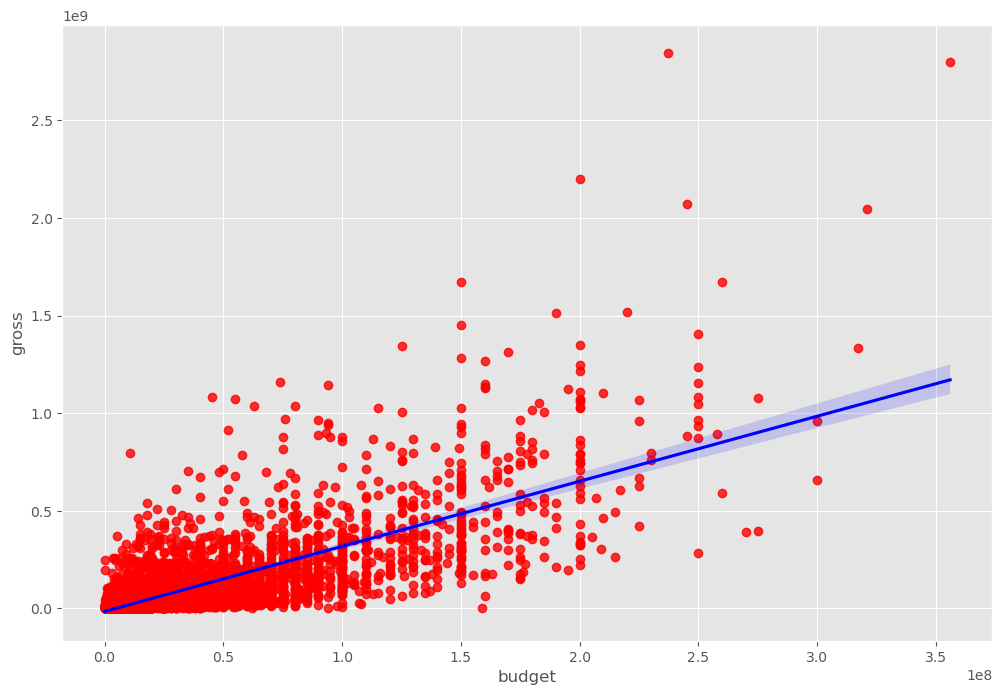

In [84]:
#Plot Budget vs Gross using seaborn

sns.regplot(x= 'budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [90]:
#Correlation

#df.corr()
df.corr(numeric_only=True)

df.corr(numeric_only=True, method='pearson')

df.corr(numeric_only=True, method='kendall')

df.corr(numeric_only=True, method='spearman')


,budget,gross,runtime,score,votes,year,yearcorrect
budget,1.000000,0.692958,0.330794,-0.009971,0.493461,0.312886,0.301319
gross,0.692958,1.000000,0.257400,0.183192,0.745793,0.351045,0.338824
runtime,0.330794,0.257400,1.000000,0.412155,0.300621,0.095444,0.095559
score,-0.009971,0.183192,0.412155,1.000000,0.495409,0.057741,0.063547
votes,0.493461,0.745793,0.300621,0.495409,1.000000,0.427623,0.421171
year,0.312886,0.351045,0.095444,0.057741,0.427623,1.000000,0.998964
yearcorrect,0.301319,0.338824,0.095559,0.063547,0.421171,0.998964,1.000000


In [91]:
#High correlation between budget and gross


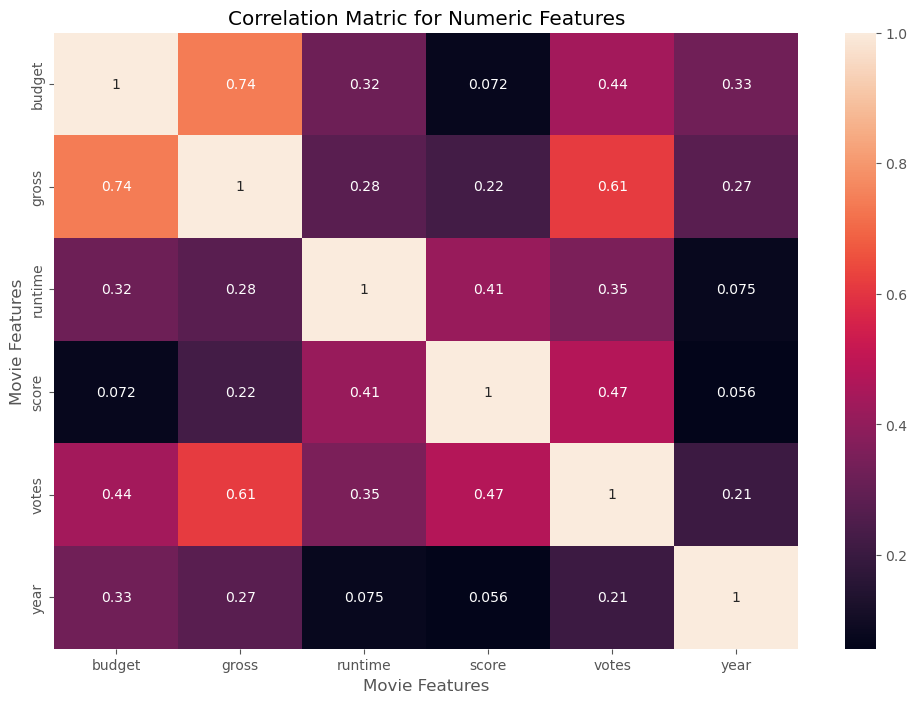

In [94]:
df.drop('yearcorrect', axis=1, inplace=True)

correlation_matrix= df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [95]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,released_date
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009",162.0,7.8,Sam Worthington,1100000.0,James Cameron,2009,"December 18, 2009"
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019",181.0,8.4,Robert Downey Jr.,903000.0,Christopher Markus,2019,"April 26, 2019"
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997",194.0,7.8,Leonardo DiCaprio,1100000.0,James Cameron,1997,"December 19, 1997"
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015",138.0,7.8,Daisy Ridley,876000.0,Lawrence Kasdan,2015,"December 18, 2015"
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018",149.0,8.4,Robert Downey Jr.,897000.0,Christopher Markus,2018,"April 27, 2018"


In [107]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,released_date
5445,237000000,1382,47,785,0,2847246203,386,5,496,162.0,7.8,1534,1100000.0,1263,2009,496
7445,356000000,983,47,105,0,2797501328,388,5,124,181.0,8.4,1470,903000.0,513,2019,124
3045,200000000,1382,47,785,6,2201647264,4909,5,502,194.0,7.8,1073,1100000.0,1263,1997,502
6663,245000000,945,47,768,0,2069521700,3643,5,498,138.0,7.8,356,876000.0,1806,2015,498
7244,321000000,983,47,105,0,2048359754,389,5,132,149.0,8.4,1470,897000.0,513,2018,132


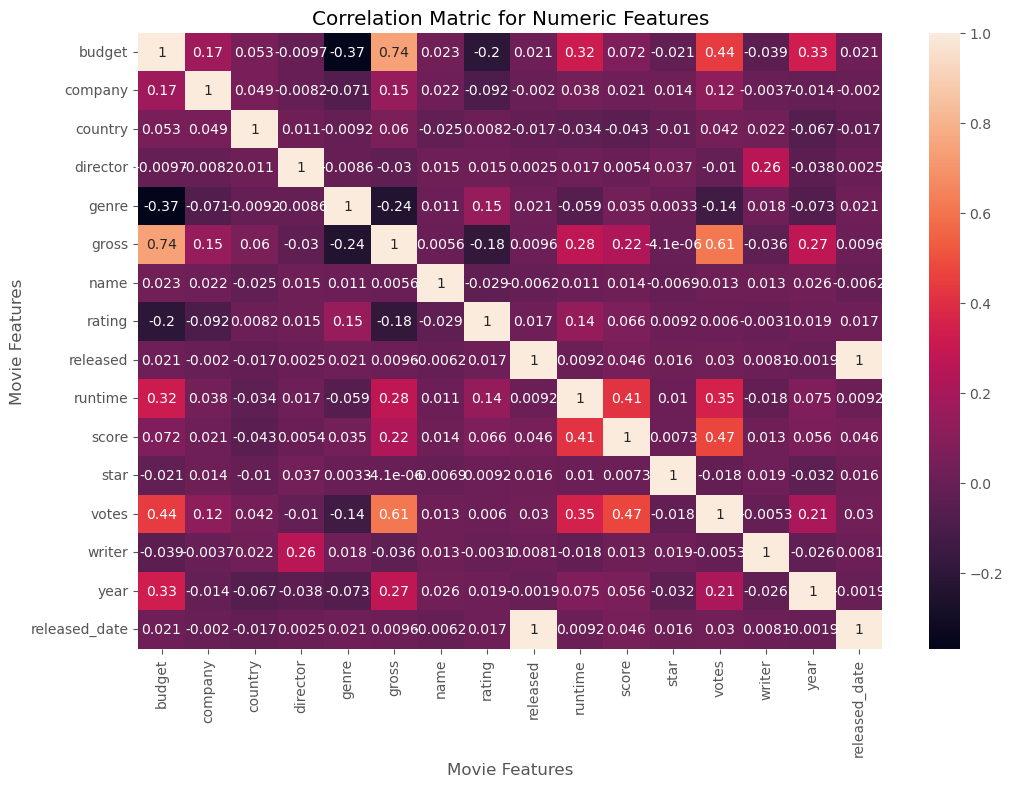

In [98]:
correlation_matrix= df_numerized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [99]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,released_date
budget,1.000000,0.170235,0.052977,-0.009662,-0.368523,0.740247,0.023392,-0.203946,0.021144,0.318695,0.072001,-0.021473,0.439675,-0.039466,0.327722,0.021144
company,0.170235,1.000000,0.048569,-0.008223,-0.071334,0.149553,0.021697,-0.092357,-0.001996,0.037585,0.020656,0.014082,0.118470,-0.003697,-0.014333,-0.001996
country,0.052977,0.048569,1.000000,0.011133,-0.009164,0.060078,-0.025490,0.008230,-0.017043,-0.034477,-0.043051,-0.009990,0.041551,0.022488,-0.066748,-0.017043
director,-0.009662,-0.008223,0.011133,1.000000,-0.008553,-0.029560,0.015246,0.014656,0.002481,0.017433,0.005413,0.036593,-0.010376,0.261735,-0.038354,0.002481
genre,-0.368523,-0.071334,-0.009164,-0.008553,1.000000,-0.244101,0.010996,0.147796,0.021321,-0.059237,0.035106,0.003341,-0.135990,0.017578,-0.073167,0.021321
gross,0.740247,0.149553,0.060078,-0.029560,-0.244101,1.000000,0.005639,-0.181906,0.009643,0.275796,0.222556,-0.000004,0.614751,-0.035885,0.274321,0.009643
name,0.023392,0.021697,-0.025490,0.015246,0.010996,0.005639,1.000000,-0.029234,-0.006155,0.010850,0.014450,-0.006882,0.012615,0.012880,0.025542,-0.006155
rating,-0.203946,-0.092357,0.008230,0.014656,0.147796,-0.181906,-0.029234,1.000000,0.017349,0.140792,0.065983,0.009196,0.006031,-0.003149,0.019499,0.017349
released,0.021144,-0.001996,-0.017043,0.002481,0.021321,0.009643,-0.006155,0.017349,1.000000,0.009234,0.046091,0.015558,0.029593,0.008145,-0.001888,1.000000
runtime,0.318695,0.037585,-0.034477,0.017433,-0.059237,0.275796,0.010850,0.140792,0.009234,1.000000,0.414068,0.010108,0.352303,-0.017561,0.075077,0.009234


In [100]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget         budget           1.000000
               company          0.170235
               country          0.052977
               director        -0.009662
               genre           -0.368523
               gross            0.740247
               name             0.023392
               rating          -0.203946
               released         0.021144
               runtime          0.318695
               score            0.072001
               star            -0.021473
               votes            0.439675
               writer          -0.039466
               year             0.327722
               released_date    0.021144
company        budget           0.170235
               company          1.000000
               country          0.048569
               director        -0.008223
               genre           -0.071334
               gross            0.149553
               name             0.021697
               rating          -0.092357
               r

In [102]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget         genre           -0.368523
genre          budget          -0.368523
               gross           -0.244101
gross          genre           -0.244101
rating         budget          -0.203946
budget         rating          -0.203946
gross          rating          -0.181906
rating         gross           -0.181906
votes          genre           -0.135990
genre          votes           -0.135990
rating         company         -0.092357
company        rating          -0.092357
genre          year            -0.073167
year           genre           -0.073167
company        genre           -0.071334
genre          company         -0.071334
country        year            -0.066748
year           country         -0.066748
genre          runtime         -0.059237
runtime        genre           -0.059237
score          country         -0.043051
country        score           -0.043051
writer         budget          -0.039466
budget         writer          -0.039466
director       y

In [103]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross          votes            0.614751
votes          gross            0.614751
budget         gross            0.740247
gross          budget           0.740247
released_date  released         1.000000
budget         budget           1.000000
writer         writer           1.000000
votes          votes            1.000000
star           star             1.000000
score          score            1.000000
runtime        runtime          1.000000
released       released_date    1.000000
               released         1.000000
rating         rating           1.000000
name           name             1.000000
gross          gross            1.000000
genre          genre            1.000000
director       director         1.000000
country        country          1.000000
company        company          1.000000
year           year             1.000000
released_date  released_date    1.000000
dtype: float64

In [ ]:
#Votes and Budget have the highest correlation to gross earnings

#Company has low correlation